## Preguntas a responder

14. Que impacto tiene la duracion de la promocion en el volumen de ventas?
Realizar una comparación entre las ventas y la duración de la promoción, es decir, si la promoción duró más se produjeron más ventas? Esto es un poco complicado porque imagino que de acuerdo al % de descuento puede variar.
15. Relación id_cadena con id_producto, ver que productos vende más una cadena en particular.
16. Con respecto a latitud y longitud, se puede hacer un gráfico que relacione la ubicación con las ventas por ejemplo, para ver si hay alguna zona donde se produzcan más ventas que otras.
17. Cuando se vende mas un producto cuando tiene promociones o cuando no tiene promociones?  Relacionar las ventas del producto si tiene promocion y cuando no tiene promocion.
18. Cuales productos no se venden asi tengan una promocion?
19. Cantidad de inventario de productos que mas se venden?
20. Cantidad de inventario del producto que menos se vende?

In [15]:
# Importamos las librerías:
import matplotlib.pyplot as plt
plt.style.use('classic')
# Línea necesaria para que Matplotlib muestre por defecto los gráficos en nuestro Notebook:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

In [16]:
datos="D:/Desodorantes/deodorants_final_merged_v1.csv"
df = pd.read_csv(datos, low_memory=False)

In [10]:
df.head(5)

,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,...,local,punto_dist,desc_producto,razon_social,id_region,dia_semana,is_weekend,tiene_promo,estacion,zona
0,5205,273921,2019-07-14,7,0,157.03,1,9217,7,2019,...,1,0,freshmatic airwick lavanda repuesto 250.00 mlt,reckitt benckiser argentina s.a.,1,Sunday,1,0,verano,4
1,9026,273920,2019-07-14,18,0,157.03,1,9217,7,2019,...,1,0,refill citrico oil escence air wick citricos t...,reckitt benckiser argentina s.a.,1,Sunday,1,0,verano,4
2,5263,468735,2019-07-14,11,0,145.10,1,9217,7,2019,...,1,0,glade automatico 3 en 1 aromatizante de ambien...,s. c. johnson y son de arg. s.a.,1,Sunday,1,0,verano,4
3,9030,461280,2019-07-14,10,0,145.10,1,9217,7,2019,...,1,0,glade automatico desodorante de ambientes vain...,s. c. johnson y son de arg. s.a.,1,Sunday,1,0,verano,4
4,9159,470446,2019-07-14,2,0,145.10,1,9217,7,2019,...,1,0,glade automatico ref ed ltda 1 175gx6 pop frut...,s. c. johnson y son de arg. s.a.,1,Sunday,1,0,verano,4


In [4]:
df.describe()

,idb,id_producto,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,mov_weekday,...,nro_prom,duracion_promo,id_cadena,longitud,latitud,local,punto_dist,id_region,is_weekend,tiene_promo
count,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,...,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06
mean,6.989773e+03,3.785508e+05,2.065137e+01,3.136310e-01,6.423475e+01,9.610200e-01,5.434609e+03,6.485025e+00,2.017666e+03,3.002266e+00,...,7.780377e+03,1.485333e-01,4.277160e+00,-5.872835e+01,-3.506354e+01,9.897948e-01,1.020519e-02,9.283848e-01,2.866340e-01,1.630815e-02
std,3.299906e+03,9.158304e+04,1.487243e+02,8.953579e-01,6.580358e+01,1.935474e-01,4.533852e+03,3.453803e+00,9.815391e-01,2.000099e+00,...,6.063741e+04,1.240366e+00,2.618480e+00,1.394684e+00,2.036040e+00,1.005039e-01,1.005039e-01,2.578497e-01,4.521891e-01,1.266578e-01
min,2.420000e+02,1.641460e+05,-5.420000e+02,-4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.016000e+03,0.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,-6.749604e+01,-4.587265e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.208000e+03,2.929450e+05,6.000000e+00,0.000000e+00,2.251000e+01,1.000000e+00,0.000000e+00,3.000000e+00,2.017000e+03,1.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,-5.869611e+01,-3.498957e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,9.026000e+03,4.152680e+05,1.000000e+01,0.000000e+00,3.823000e+01,1.000000e+00,9.217000e+03,6.000000e+00,2.018000e+03,3.000000e+00,...,0.000000e+00,0.000000e+00,4.000000e+00,-5.846482e+01,-3.462789e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,9.159000e+03,4.583930e+05,1.700000e+01,0.000000e+00,7.673000e+01,1.000000e+00,9.217000e+03,1.000000e+01,2.018000e+03,5.000000e+00,...,0.000000e+00,0.000000e+00,4.000000e+00,-5.839790e+01,-3.457732e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,9.977000e+03,5.113260e+05,1.621800e+04,6.120000e+02,4.238100e+02,1.000000e+00,9.217000e+03,1.200000e+01,2.019000e+03,6.000000e+00,...,5.410660e+05,1.800000e+01,9.000000e+00,-5.668353e+01,-2.914198e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


#### 14. Qué impacto tiene la duración de la promoción en el volumen de ventas?
Realizar una comparación entre las ventas y la duración de la promoción, es decir, si la promoción duró más se produjeron más ventas? 

In [17]:
df_promo_venta = df.groupby('duracion_promo', as_index= False)['venta_unidades'].sum()
df_promo_ventas=df_promo_venta[df_promo_venta['duracion_promo']>0]
df_promo_ventas

,duracion_promo,venta_unidades
1,3,180
2,4,34
3,6,2271
4,7,39464
5,8,6286
6,9,6045
7,10,3895
8,11,179
9,14,2817
10,15,394


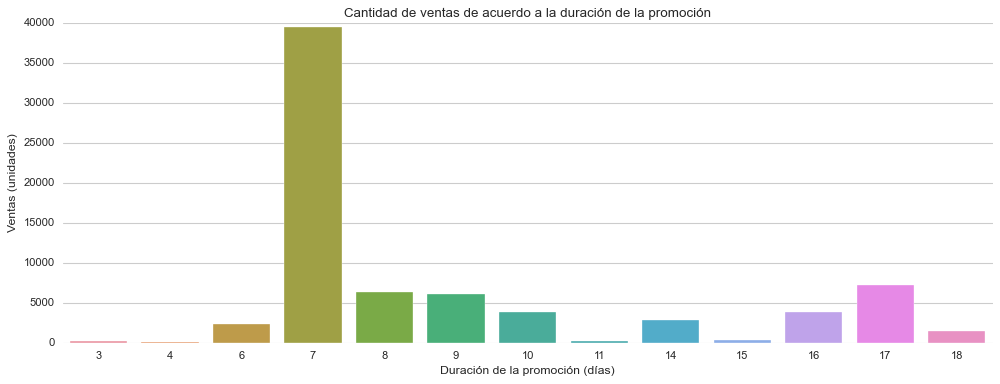

In [82]:
plt.figure(figsize=[15,5])
with sns.axes_style('whitegrid'):
    sns.barplot(x='duracion_promo', y='venta_unidades', data=df_promo_ventas, errorbar=None)

        # set the color palette
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.title("Cantidad de ventas de acuerdo a la duración de la promoción")
    plt.xlabel('Duración de la promoción (días)')
    plt.ylabel('Ventas (unidades)')

De acuerdo al gráfico obtenido, se puede observar que la mayor cantidad de ventas se producen cuando la duración de la promoción es de 7 días.

In [63]:
# Selecciona solo las filas con promoción
df_promo = df[df['tiene_promo'] == 1]

# Agrupa los datos por duración de promoción y cuenta el número de promociones para cada duración
nro_promo_por_duracion = df_promo.groupby('duracion_promo')['nro_prom'].count()

# Agrupa los datos por duración de promoción y calcula la cantidad total de unidades vendidas para cada duración
venta_unidades_por_duracion = df_promo.groupby('duracion_promo')['venta_unidades'].sum()

# Calcula el porcentaje de ventas total que representan las ventas con promoción para cada duración
total_ventas_promo = 74011
porcentaje_ventas_promo_por_duracion = venta_unidades_por_duracion / total_ventas_promo * 100

# Agrega una columna adicional que calcule el porcentaje de promociones para cada duración
total_promo = 136270
porcentaje_promo_por_duracion = nro_promo_por_duracion / total_promo * 100

# Crea un DataFrame con los datos obtenidos y renombra las columnas
tabla = pd.concat([nro_promo_por_duracion, venta_unidades_por_duracion, porcentaje_ventas_promo_por_duracion, porcentaje_promo_por_duracion], axis=1)
tabla.columns = ['nro_promo', 'venta_unidades', 'porcentaje_ventas_promo', 'porcentaje_promo']

# Muestra la tabla resultante
print(tabla)


                nro_promo  venta_unidades  porcentaje_ventas_promo  \
duracion_promo                                                       
3                     336             180                 0.243207   
4                      80              34                 0.045939   
6                    3668            2271                 3.068463   
7                   73663           39464                53.321804   
8                   15314            6286                 8.493332   
9                   10240            6045                 8.167705   
10                   7834            3895                 5.262731   
11                    216             179                 0.241856   
14                   3487            2817                 3.806191   
15                   2098             394                 0.532353   
16                   4386            3819                 5.160044   
17                  12744            7163                 9.678291   
18                  

C:\Users\ro424\AppData\Local\Temp\ipykernel_31348\4142765262.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


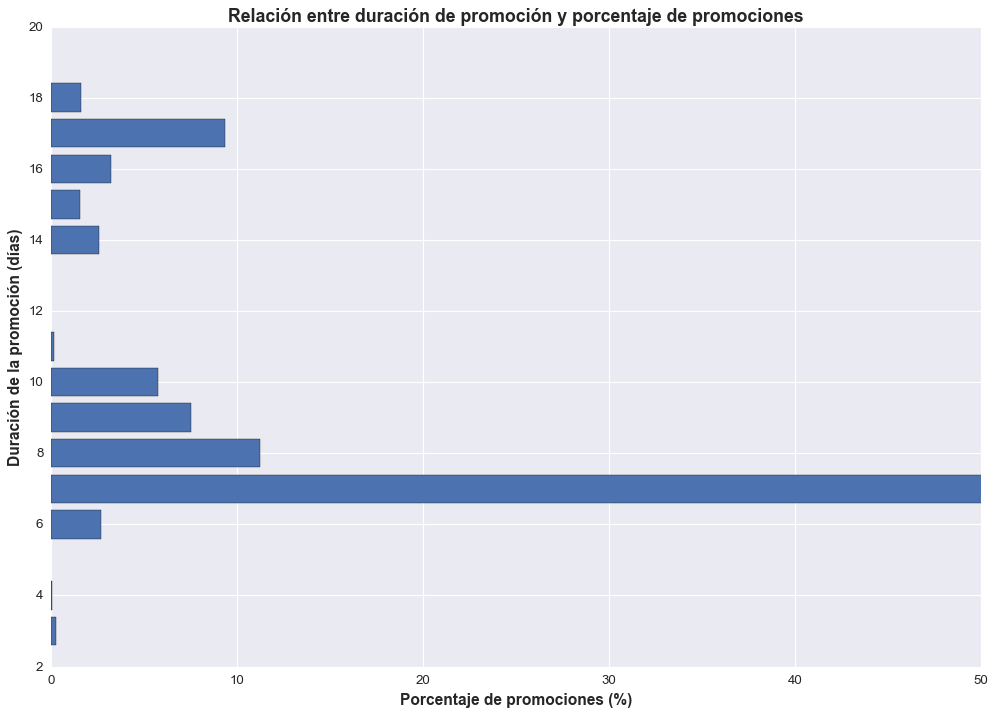

In [80]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Crea un gráfico de barras horizontal que muestre la relación entre duracion_promo y porcentaje_promo
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(tabla.index, tabla['porcentaje_promo'])

# Agrega etiquetas al gráfico y ajusta los límites de los ejes
ax.set_xlabel('Porcentaje de promociones (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Duración de la promoción (días)', fontsize=14, fontweight='bold')
ax.set_title('Relación entre duración de promoción y porcentaje de promociones', fontsize=16, fontweight='bold')
ax.set_xlim([0, 50])
ax.tick_params(axis='both', which='major', labelsize=12)

# Oculta la línea de borde del gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Muestra el gráfico
plt.show()


C:\Users\ro424\AppData\Local\Temp\ipykernel_31348\566422667.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


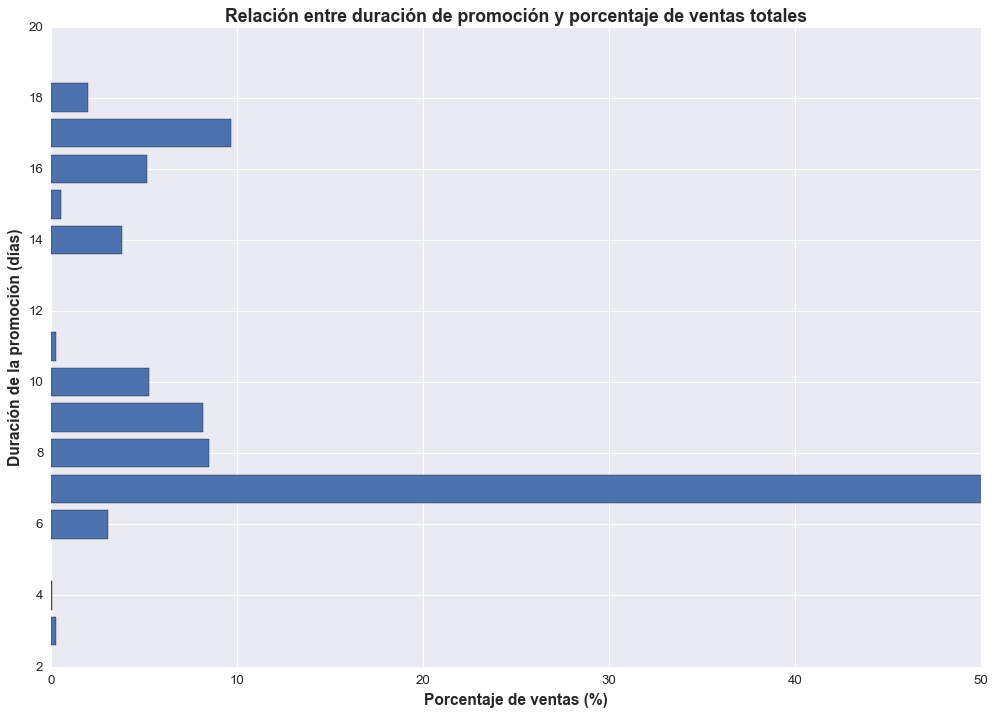

In [81]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Crea un gráfico de barras horizontal que muestre la relación entre duracion_promo y porcentaje_promo
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(tabla.index, tabla['porcentaje_ventas_promo'])

# Agrega etiquetas al gráfico y ajusta los límites de los ejes
ax.set_xlabel('Porcentaje de ventas (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Duración de la promoción (días)', fontsize=14, fontweight='bold')
ax.set_title('Relación entre duración de promoción y porcentaje de ventas totales', fontsize=16, fontweight='bold')
ax.set_xlim([0, 50])
ax.tick_params(axis='both', which='major', labelsize=12)

# Oculta la línea de borde del gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Muestra el gráfico
plt.show()

De acuerdo al gráfico obtenido, se puede observar que la mayor cantidad de ventas se producen cuando la duración de la promoción es de 7 días.

#### 15. Relación id_cadena con id_producto, ver qué cadena vende más productos.

In [21]:
# Agrupar por id_cadena e id_producto y sumar las ventas
df_productos_por_cadena = df.groupby(['desc_cadena', 'id_producto']).agg({'venta_unidades': 'sum'}).reset_index()

# Agrupar por id_cadena y sumar las ventas de todos los productos
df_ventas_por_cadena = df_productos_por_cadena.groupby(['desc_cadena']).agg({'venta_unidades': 'sum'}).reset_index()

# Ordenar en orden descendente por ventas
df_ventas_por_cadena = df_ventas_por_cadena.sort_values('venta_unidades', ascending=False)
df_ventas_por_cadena

,desc_cadena,venta_unidades
2,vea,962582
1,jumbo,881481
0,disco,777627


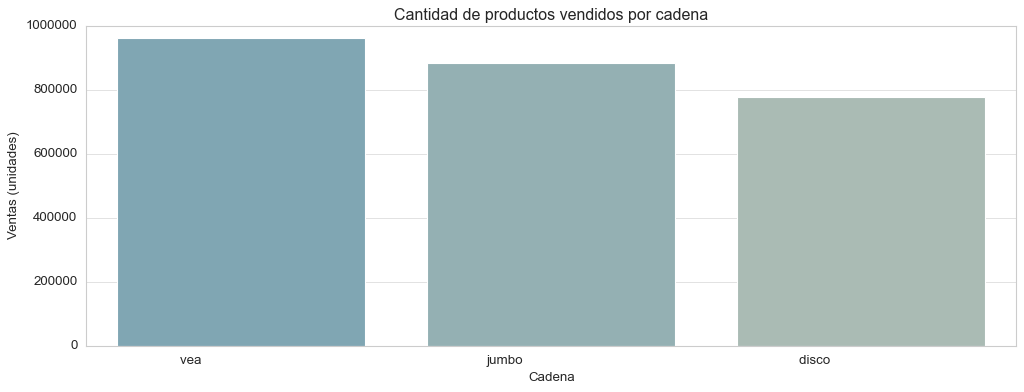

In [45]:
plt.figure(figsize=[15,5])
with sns.axes_style('whitegrid'):
    sns.barplot(x='desc_cadena', y='venta_unidades', data=df_ventas_por_cadena, errorbar=None)

        # set the color palette
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.title("Cantidad de productos vendidos por cadena")
    plt.xlabel('Cadena')
    plt.ylabel('Ventas (unidades)')
    plt.savefig(f'images/Cantidad_de_productos_vendidos_por_cadena', dpi=300, bbox_inches='tight')
   

Se puede observar que de las cinco cadenas existentes, sólo las cadenas Disco, Jumbo y Vea son las que presentan ventas productos.

#### 17. Cuándo se vende más un producto cuando tiene promociones o cuando no tiene promociones?  Relacionar las ventas del producto si tiene promoción y cuando no tiene promoción.

#### Análisis realizado para todos los productos en general

In [11]:
df_ventas_promo = df.groupby(['id_producto', 'tiene_promo']).sum()['venta_unidades'].reset_index()

# Obtener las ventas cuando tiene promoción y cuando no tiene promoción
ventas_promo = df_ventas_promo.loc[df_ventas_promo['tiene_promo'] == 1]

total_ventas_promo = ventas_promo.venta_unidades.sum()

# Obtener las ventas cuando tiene promoción y cuando no tiene promoción
ventas_promo = df_ventas_promo.loc[df_ventas_promo['tiene_promo'] == 1]
ventas_sin_promo = df_ventas_promo.loc[df_ventas_promo['tiene_promo'] == 0]

# Calcular la cantidad total de ventas para cada caso
total_ventas_promo = ventas_promo.venta_unidades.sum()
total_ventas_sin_promo = ventas_sin_promo.venta_unidades.sum()

# Imprimir los resultados
print(f"La cantidad total de ventas con promoción es {total_ventas_promo}")
print(f"La cantidad total de ventas sin promoción es {total_ventas_sin_promo}")
if (total_ventas_promo > total_ventas_sin_promo).all():
    print("Se venden más productos con promoción.")
elif (total_ventas_promo < total_ventas_sin_promo).all():
    print("Se venden más productos sin promoción.")
else:
    print("Las ventas con promoción y sin promoción son iguales.")

La cantidad total de ventas con promoción es 74001
La cantidad total de ventas sin promoción es 2546836
Se venden más productos sin promoción.


C:\Users\ro424\AppData\Local\Temp\ipykernel_16884\808845100.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ventas_promo = df.groupby(['id_producto', 'tiene_promo']).sum()['venta_unidades'].reset_index()


In [37]:
df_ventas= df.groupby(['id_producto', 'tiene_promo'])['venta_unidades'].mean().reset_index()
df_ventas

,id_producto,tiene_promo,venta_unidades
0,164146,0,0.105091
1,164146,1,0.186275
2,164149,0,0.310996
3,164149,1,0.265641
4,228217,0,0.533954
...,...,...,...
162,507528,1,0.282609
163,507832,0,0.287126
164,511324,0,0.148225
165,511325,0,0.131770


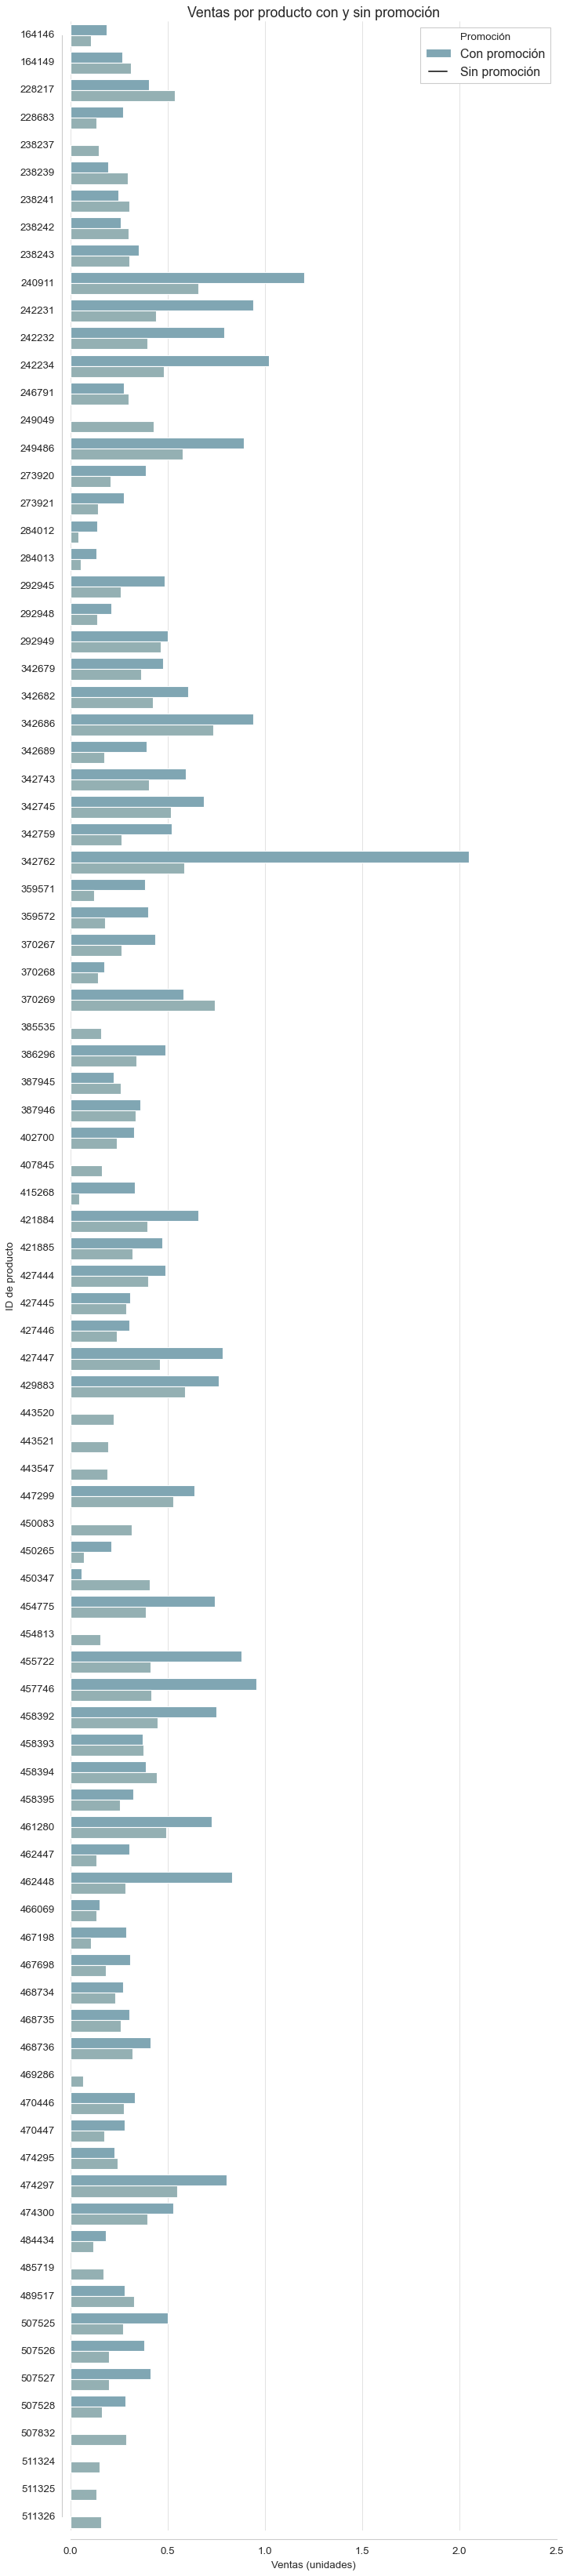

In [44]:
plt.figure(figsize=[10,50])
with sns.axes_style("whitegrid"):
    ax = sns.barplot(x='venta_unidades', y='id_producto', hue='tiene_promo', data=df_ventas, orient='h',  hue_order=[1, 0])
    sns.despine(offset=10, trim=True)
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.title('Ventas por producto con y sin promoción', fontsize=16)
    plt.xlabel('Ventas (unidades)', fontsize=12)
    plt.ylabel('ID de producto', fontsize=12)
    bars = ax.containers
    bar1 = bars[0]
    bar2 = bars[1]
    bar1.patches[0].set_label('Sin promoción')
    bar2.patches[1].set_label('Con promoción')
    plt.legend(title='Promoción', labels=['Con promoción', 'Sin promoción'])
    plt.savefig(f'images/Ventas por producto con y sin promoción', dpi=300, bbox_inches='tight')
plt.show()

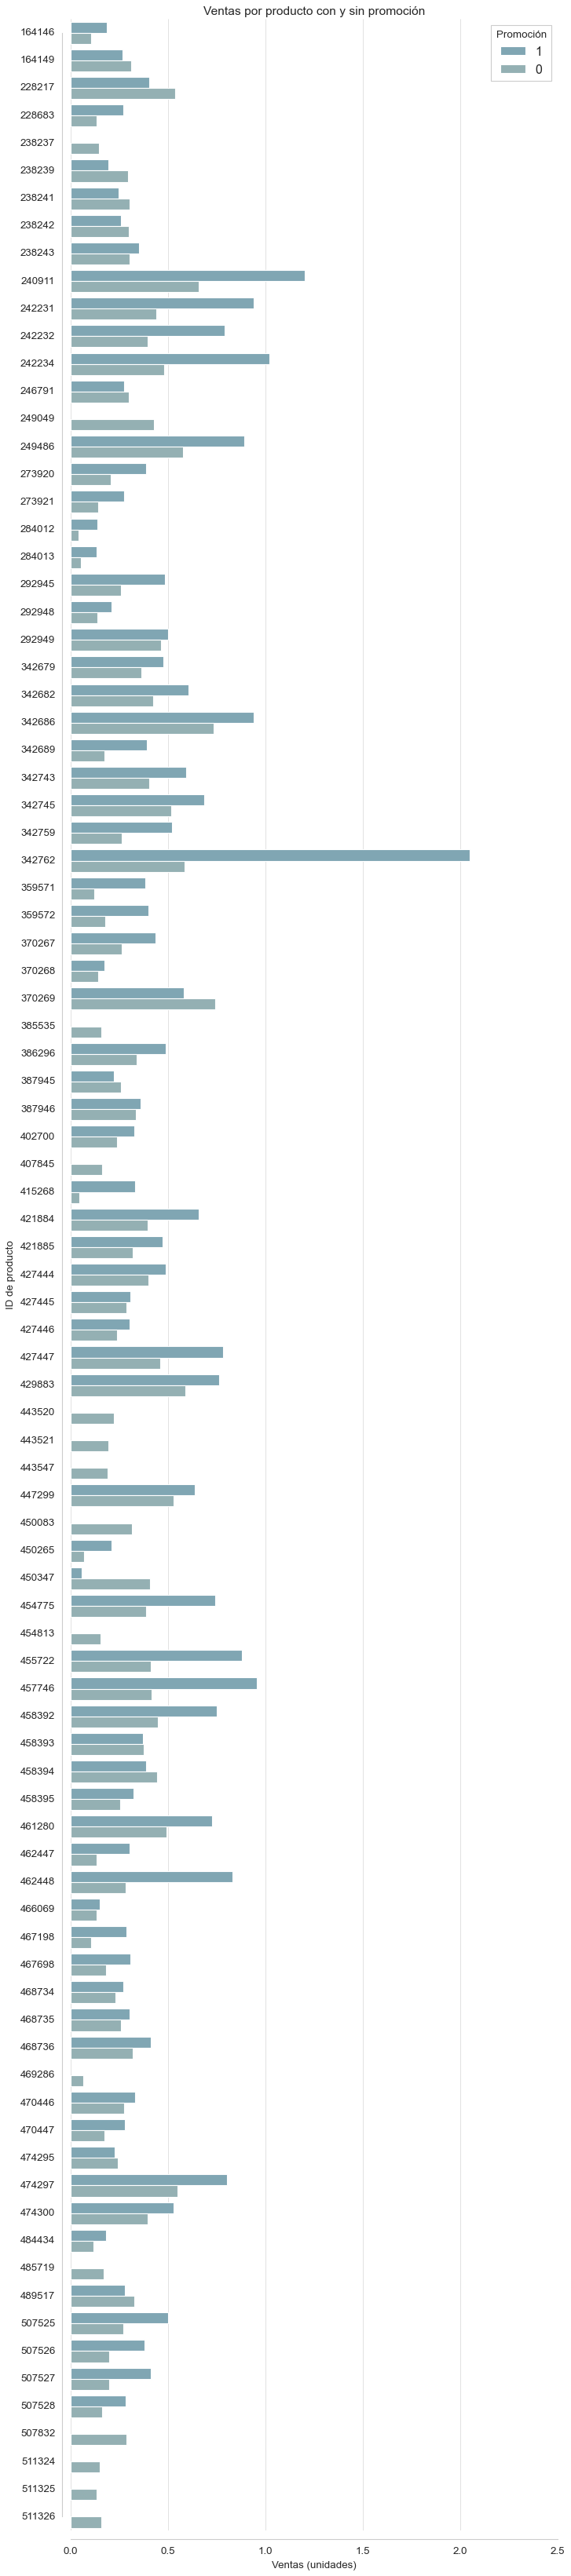

In [42]:
plt.figure(figsize=[10,50])
with sns.axes_style("whitegrid"):
    ax = sns.barplot(x='venta_unidades', y='id_producto', hue='tiene_promo', data=df_ventas, orient='h',  hue_order=[1, 0])
    sns.despine(offset=10, trim=True)
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.title('Ventas por producto con y sin promoción', fontsize=14)
    plt.xlabel('Ventas (unidades)', fontsize=12)
    plt.ylabel('ID de producto', fontsize=12)
    #bar1.patches[0].set_label('Sin promoción')
    #bar2.patches[1].set_label('Con promoción')
    plt.legend(title='Promoción') #, labels=['Con promoción', 'Sin promoción'])
    plt.savefig(f'images/Ventas por producto con y sin promoción', dpi=300, bbox_inches='tight')
    
plt.show()

#### Análisis realizado para aquellos productos que se venden con y sin promoción 

In [13]:
df_ventas_promo = df.groupby(['id_producto', 'tiene_promo']).sum()['venta_unidades'].reset_index()

# Obtener los id_producto que tienen ventas con promoción y sin promoción
id_producto_con_promo = set(df_ventas_promo.loc[df_ventas_promo['tiene_promo'] == 1, 'id_producto'].unique())
id_producto_sin_promo = set(df_ventas_promo.loc[df_ventas_promo['tiene_promo'] == 0, 'id_producto'].unique())

# Obtener la intersección de ambos conjuntos
id_producto_en_ambos = id_producto_con_promo.intersection(id_producto_sin_promo)

# Filtrar el DataFrame original por los id_producto en ambos conjuntos
df_ventas_en_ambos = df.loc[df['id_producto'].isin(id_producto_en_ambos)]

# Obtener las ventas cuando tiene promoción y cuando no tiene promoción
ventas_promo = df_ventas_en_ambos.loc[df['tiene_promo'] == 1]
ventas_sin_promo = df_ventas_en_ambos.loc[df['tiene_promo'] == 0]

# Calcular la cantidad total de ventas para cada caso
total_ventas_promo = ventas_promo.venta_unidades.sum()
total_ventas_sin_promo = ventas_sin_promo.venta_unidades.sum()

# Imprimir los resultados
print(f"La cantidad total de ventas con promoción es {total_ventas_promo}")
print(f"La cantidad total de ventas sin promoción es {total_ventas_sin_promo}")
if total_ventas_promo > total_ventas_sin_promo:
    print("Se venden más productos con promoción.")
elif total_ventas_promo < total_ventas_sin_promo:
    print("Se venden más productos sin promoción.")
else:
    print("Las ventas con promoción y sin promoción son iguales.")

C:\Users\ro424\AppData\Local\Temp\ipykernel_16884\2072268022.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ventas_promo = df.groupby(['id_producto', 'tiene_promo']).sum()['venta_unidades'].reset_index()


La cantidad total de ventas con promoción es 74001
La cantidad total de ventas sin promoción es 2366298
Se venden más productos sin promoción.


#### 18. Qué productos no se venden así tengan una promoción?
Terminar este punto

In [39]:

id_producto_sin_ventas = set(df.loc[(df['tiene_promo'] == 1) & (df['venta_unidades'] == 0), 'id_producto'])
id_producto_sin_ventas

{164146,
 164149,
 228217,
 228683,
 238239,
 238241,
 238242,
 238243,
 240911,
 242231,
 242232,
 242234,
 246791,
 249486,
 273920,
 273921,
 284012,
 284013,
 292945,
 292948,
 292949,
 342679,
 342682,
 342686,
 342689,
 342743,
 342745,
 342759,
 342762,
 359571,
 359572,
 370267,
 370268,
 370269,
 386296,
 387945,
 387946,
 402700,
 415268,
 421884,
 421885,
 427444,
 427445,
 427446,
 427447,
 429883,
 447299,
 450265,
 450347,
 454775,
 455722,
 457746,
 458392,
 458393,
 458394,
 458395,
 461280,
 462447,
 462448,
 466069,
 467198,
 467698,
 468734,
 468735,
 468736,
 470446,
 470447,
 474295,
 474297,
 474300,
 484434,
 489517,
 507525,
 507526,
 507527,
 507528}

#### 19. Cantidad de inventario de productos que más se venden?

In [14]:

# Obtener la cantidad total de unidades vendidas por producto
total_unidades_vendidas = df.groupby('id_producto')['venta_unidades'].sum()

# Ordenar los resultados por cantidad de unidades vendidas
total_unidades_vendidas = total_unidades_vendidas.sort_values(ascending=False)

# Obtener la cantidad total de inventario por producto
total_inventario = df.groupby('id_producto')['stock_unidades'].sum()

# Fusionar los resultados anteriores en un nuevo DataFrame
df_resumen = pd.concat([total_unidades_vendidas, total_inventario], axis=1, join='inner')

# Ordenar el resultado por la cantidad total de unidades vendidas
df_resumen = df_resumen.sort_values(by='venta_unidades', ascending=False)

# Mostrar los primeros 10 productos con mayor cantidad de unidades vendidas y su inventario correspondiente
print(df_resumen.head(10))

             venta_unidades  stock_unidades
id_producto                                
342686               109531         7484003
240911               100861         5491416
429883                89345         3732450
249486                86737         3337434
342745                72907         5031183
228217                68809         3325219
242234                68083         4250074
447299                66318         2857150
292949                64371         3391324
242231                62046         4173632


#### 20. Cantidad de inventario del producto que menos se vende?

In [28]:
menos_vendido = df[df['venta_unidades'] == df['venta_unidades'].min()]
menos_vendido

,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,...,latitud,local,punto_dist,desc_producto,razon_social,id_region,dia_semana,is_weekend,tiene_promo,estacion
3923898,5213,427444,2017-10-14,90,-45,73.78,1,0,10,2017,...,-34.621431,1,0,glade aerosol gld automatico rep manzana y can...,s. c. johnson y son de arg. s.a.,1,Saturday,1,0,otono


In [29]:
inventario_menos_vendido = menos_vendido['stock_unidades'].iloc[0]
inventario_menos_vendido

90

#### 21. Cantidad de inventario de los productos que menos se venden?

In [37]:
# Agrupar por id_producto y sumar las unidades vendidas
df_unidades_vendidas = df.groupby('id_producto')['venta_unidades'].sum()

# Ordenar el DataFrame de manera ascendente según las unidades vendidas
df_unidades_vendidas = df_unidades_vendidas.sort_values()

# Seleccionar los últimos productos (los que menos se venden)
df_menos_vendidos = df_unidades_vendidas.head().reset_index()
df_menos_vendidos

,id_producto,venta_unidades
0,497936,0
1,511325,1983
2,284013,2562
3,466069,2812
4,511324,2927


In [38]:
# Obtener la cantidad de inventario de los productos seleccionados
df_cantidad_inventario = df.loc[df['id_producto'].isin(df_menos_vendidos.index), 'stock_unidades']
df_cantidad_inventario

Series([], Name: stock_unidades, dtype: int64)

#### Comparativa de ventas de productos por meses de acuerdo al año

In [46]:
df_ventas_mes_prod= df.groupby(['id_producto', 'mov_month', 'mov_year'])['venta_unidades'].sum().reset_index()
df_ventas_mes_prod

,id_producto,mov_month,mov_year,venta_unidades
0,164146,1,2017,106
1,164146,1,2018,114
2,164146,1,2019,236
3,164146,2,2017,120
4,164146,2,2018,104
...,...,...,...,...
3099,511326,5,2019,514
3100,511326,6,2019,583
3101,511326,7,2019,214
3102,511326,11,2018,69


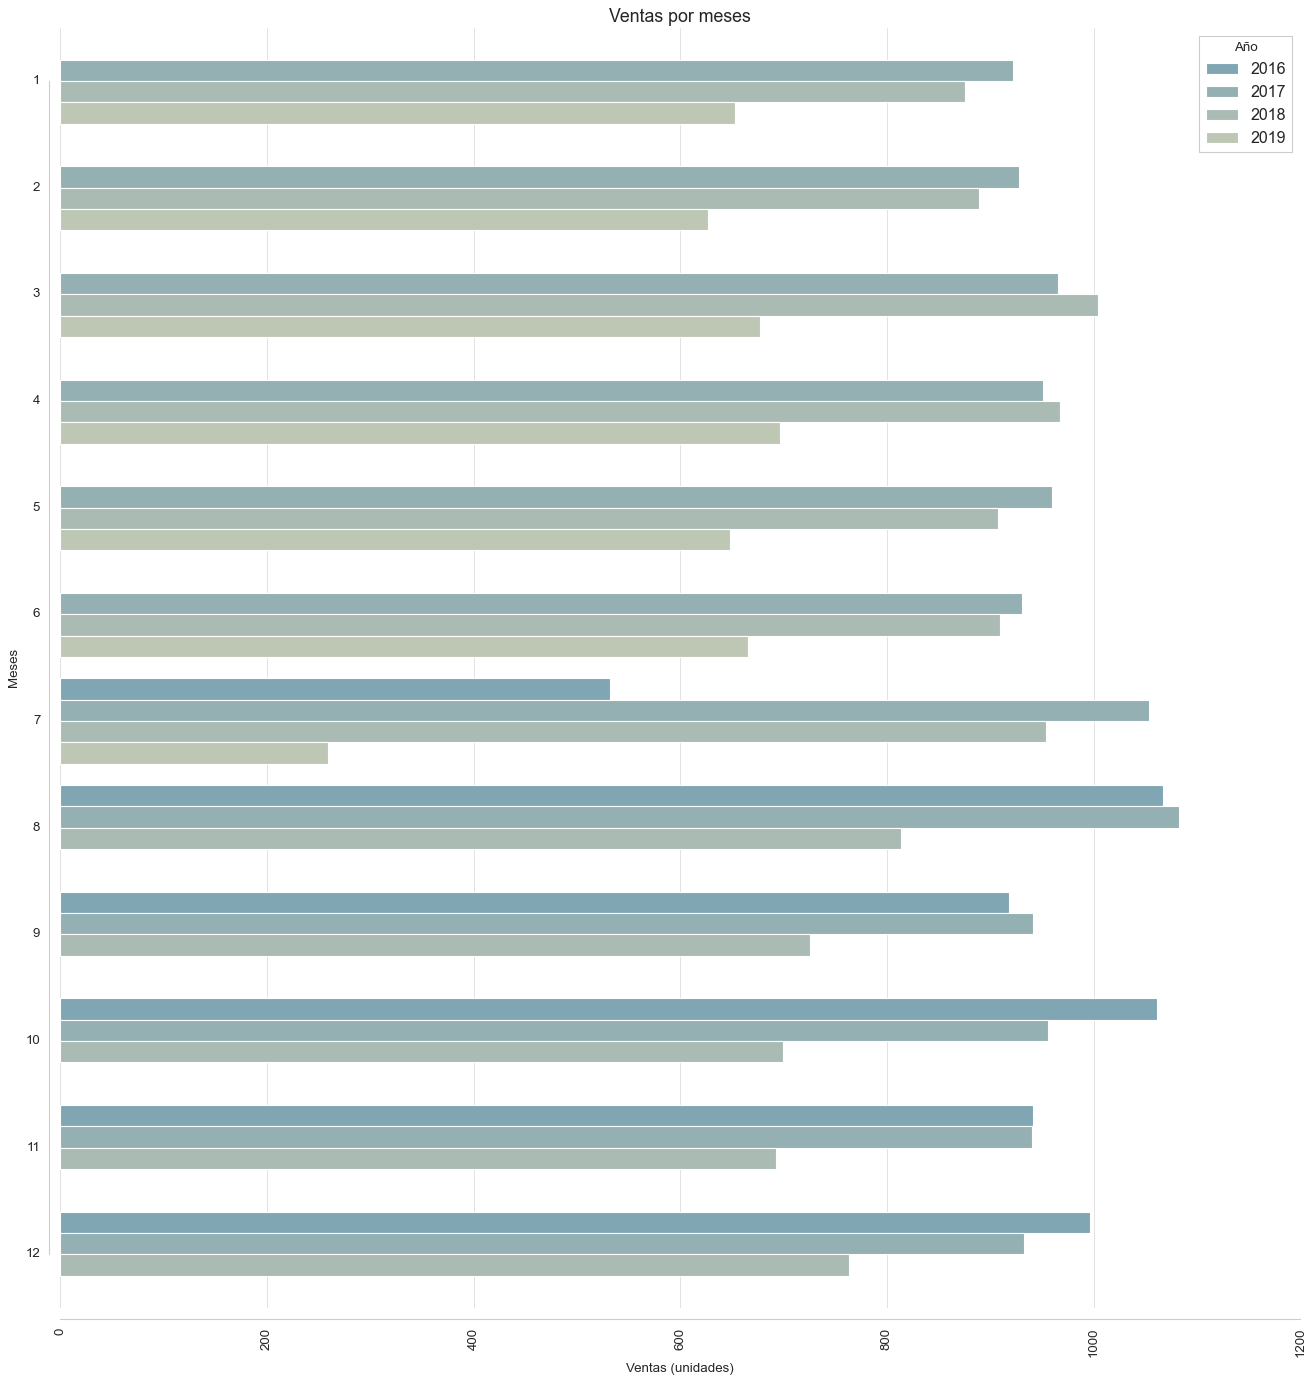

In [49]:
plt.figure(figsize=[20,20])
with sns.axes_style('whitegrid'):
    sns.barplot(x='venta_unidades', y='mov_month', data= df_ventas_mes_prod, hue= 'mov_year', orient= 'h', errorbar=None)
    sns.despine(offset=10, trim=True)
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.xticks(rotation=90)
    plt.title('Ventas por meses', fontsize=16)
    plt.xlabel('Ventas (unidades)')
    plt.ylabel('Meses')
    plt.legend(title='Año')
    plt.savefig(f'images/Ventas_por_meses', dpi=300, bbox_inches='tight')

División por zonas, Ventas por zonas

In [4]:
df_ventas_zona= df.groupby(['id_producto', 'mov_month', 'mov_year'])['venta_unidades'].sum().reset_index()
df_ventas_zona

,id_producto,mov_month,mov_year,venta_unidades
0,164146,1,2017,106
1,164146,1,2018,114
2,164146,1,2019,236
3,164146,2,2017,120
4,164146,2,2018,104
...,...,...,...,...
3099,511326,5,2019,514
3100,511326,6,2019,583
3101,511326,7,2019,214
3102,511326,11,2018,69


In [ ]:
#### Ventas de producto con y sin promoción por día de semana

In [84]:
df_día_semana_mas_venta = df.groupby(['dia_semana', 'tiene_promo'])['venta_unidades'].mean().reset_index()

# Definir el orden de las categorías de día de la semana
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Conviertir la columna 'dia_semana' en una categoría ordenada
df_día_semana_mas_venta['dia_semana'] = pd.Categorical(df_día_semana_mas_venta['dia_semana'], categories=order, ordered=True)

# Ordenar el DataFrame por la columna 'dia_semana'
df_día_semana_mas_venta = df_día_semana_mas_venta.sort_values('dia_semana')

df_día_semana_mas_venta



,dia_semana,tiene_promo,venta_unidades
2,Monday,0,0.322650
3,Monday,1,0.509960
10,Tuesday,0,0.219664
11,Tuesday,1,0.358810
12,Wednesday,0,0.292941
13,Wednesday,1,0.540930
8,Thursday,0,0.379695
9,Thursday,1,0.715025
0,Friday,0,0.254133
1,Friday,1,0.477904


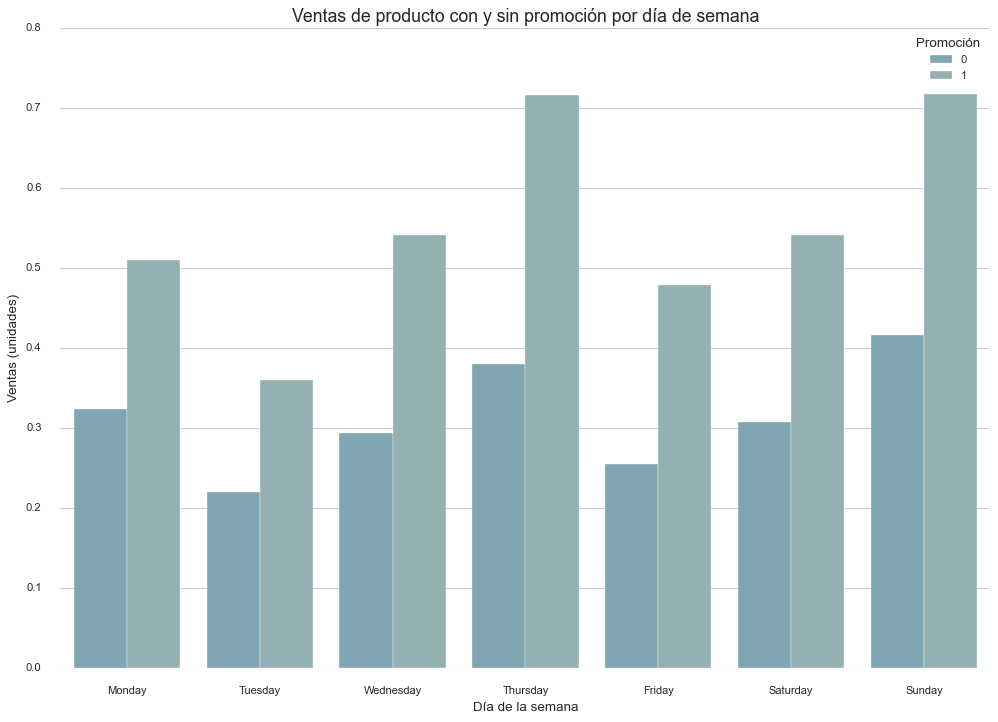

In [131]:
plt.figure(figsize=[15,10])
with sns.axes_style("whitegrid"):
    ax = sns.barplot(x='dia_semana', y='venta_unidades', hue='tiene_promo', data=df_día_semana_mas_venta)
    sns.despine(offset=10, trim=True)
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.title('Ventas de producto con y sin promoción por día de semana', fontsize=16)
    plt.xlabel('Día de la semana', fontsize=12)
    plt.ylabel('Ventas (unidades)', fontsize=12)
    plt.legend(title='Promoción')
    plt.savefig(f'images/Ventas_por_dia_de_semana_con_y_sin_promoción', dpi=300, bbox_inches='tight')
plt.show()

Al analizar los datos, se puede concluir que los días con mayor cantidad de ventas son los jueves, seguidos de los domingos, tanto para las ventas con promoción como para las ventas sin promoción.

### ¿Cuáles son las promociones más efectivas para aumentar las ventas de desodorantes?

#### Mejor pormoción a nivel general (sumatoria de ventas en general)

In [123]:
df_mejor_promo = df.groupby('nro_prom')['venta_unidades'].sum().reset_index()
df_mejor_promo = df_mejor_promo.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo=df_mejor_promo[(df_mejor_promo['nro_prom']>0)]

df_mejor_promo_2=df_mejor_promo.head(10)

df_mejor_promo_2

,nro_prom,venta_unidades
103,528346,7163
32,449953,3074
19,436830,2868
16,432776,2854
3,425200,2460
40,456807,2194
24,440561,2067
5,428910,2005
6,428918,1967
39,456804,1955


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


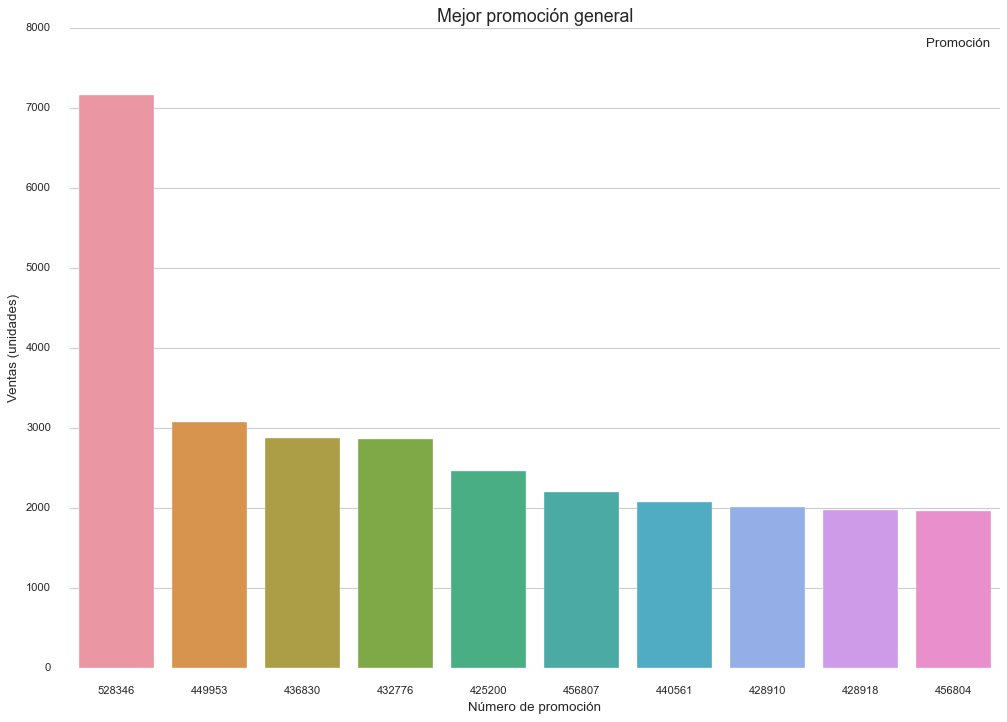

In [133]:
plt.figure(figsize=[15,10])
with sns.axes_style("whitegrid"):

            sns.barplot(x='nro_prom', y='venta_unidades', data=df_mejor_promo, 
            order=df_mejor_promo_2.sort_values('venta_unidades', ascending=False)['nro_prom'])
            sns.despine(offset=10, trim=True)
            color = "blend:#7AB,#EDA"
            sns.set_palette(sns.color_palette(color))
            plt.title('Mejor promoción general', fontsize=16)
            plt.xlabel('Número de promoción', fontsize=12)
            plt.ylabel('Ventas (unidades)', fontsize=12)
            plt.legend(title='Promoción')
            #plt.savefig(f'images/Mejor_promocion_general', dpi=300, bbox_inches='tight')
plt.show()

La promoción que ha tenido mayor cantidad de ventas es la número 528346.

#### Promociones por año

Año 2016

In [134]:
df_2016 = df[(df['mov_year'] == 2016)]


In [146]:
ventas_promo_2016 = df_2016.loc[df['tiene_promo']==1, 'venta_unidades'].sum()

print("La cantidad de ventas de productos con promoción en el año 2016 es:", ventas_promo_2016)

La cantidad de ventas de productos con promoción en el año 2016 es: 23515


In [147]:
ventas_sin_promo_2016 = df_2016.loc[df['tiene_promo']==0, 'venta_unidades'].sum()

print("La cantidad de ventas de productos sin promoción en el año 2016 es:", ventas_sin_promo_2016)

La cantidad de ventas de productos sin promoción en el año 2016 es: 418717


In [141]:
df_mejor_promo_2016 = df_2016.groupby('nro_prom')['venta_unidades'].sum().reset_index()
df_mejor_promo_2016 = df_mejor_promo_2016.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo_2016=df_mejor_promo_2016[(df_mejor_promo_2016['nro_prom']>0)]

df_mejor_promo_2016_2=df_mejor_promo_2016.head(5)

df_mejor_promo_2016_2

,nro_prom,venta_unidades
19,436830,2868
16,432776,2854
3,425200,2460
24,440561,2067
5,428910,2005


Año 2017

In [148]:
df_2017 = df[(df['mov_year'] == 2017)]

In [172]:
ventas_promo_2017 = df_2017.loc[df['tiene_promo']==1, 'venta_unidades'].sum()

print("La cantidad de ventas de productos con promoción en el año 2017 es:", ventas_promo_2017)

La cantidad de ventas de productos con promoción en el año 2017 es: 19686


In [173]:
ventas_sin_promo_2017 = df_2017.loc[df['tiene_promo']==0, 'venta_unidades'].sum()

print("La cantidad de ventas de productos sin promoción en el año 2017 es:", ventas_sin_promo_2017)

La cantidad de ventas de productos sin promoción en el año 2017 es: 921852


In [151]:
df_mejor_promo_2017 = df_2017.groupby('nro_prom')['venta_unidades'].sum().reset_index()
df_mejor_promo_2017 = df_mejor_promo_2017.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo_2017=df_mejor_promo_2017[(df_mejor_promo_2017['nro_prom']>0)]

df_mejor_promo_2017_2=df_mejor_promo_2017.head(5)

df_mejor_promo_2017_2

,nro_prom,venta_unidades
4,449953,3074
12,456807,2194
11,456804,1955
10,453692,1891
9,453690,1673


Año 2018

In [152]:
df_2018 = df[(df['mov_year'] == 2018)]

In [170]:
ventas_promo_2018 = df_2018.loc[df['tiene_promo']==1, 'venta_unidades'].sum()

print("La cantidad de ventas de productos con promoción en el año 2018 es:", ventas_promo_2018)

La cantidad de ventas de productos con promoción en el año 2018 es: 16488


In [171]:
ventas_sin_promo_2018 = df_2018.loc[df['tiene_promo']==0, 'venta_unidades'].sum()

print("La cantidad de ventas de productos sin promoción en el año 2018 es:", ventas_sin_promo_2018)

La cantidad de ventas de productos sin promoción en el año 2018 es: 837238


In [155]:
df_mejor_promo_2018 = df_2018.groupby('nro_prom')['venta_unidades'].sum().reset_index()
df_mejor_promo_2018 = df_mejor_promo_2018.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo_2018=df_mejor_promo_2018[(df_mejor_promo_2018['nro_prom']>0)]

df_mejor_promo_2018_2=df_mejor_promo_2018.head(5)

df_mejor_promo_2018_2

,nro_prom,venta_unidades
18,502702,1772
32,518153,1645
26,508392,1414
9,491206,1223
20,502706,1093


Año 2019

In [156]:
df_2019 = df[(df['mov_year'] == 2019)]

In [168]:
ventas_promo_2019 = df_2019.loc[df['tiene_promo']==1, 'venta_unidades'].sum()

print("La cantidad de ventas de productos con promoción en el año 2019 es:", ventas_promo_2019)

La cantidad de ventas de productos con promoción en el año 2019 es: 14322


In [169]:
ventas_sin_promo_2019 = df_2019.loc[df['tiene_promo']==0, 'venta_unidades'].sum()

print("La cantidad de ventas de productos sin promoción en el año 2019 es:", ventas_sin_promo_2019)

La cantidad de ventas de productos sin promoción en el año 2019 es: 369872


In [159]:
df_mejor_promo_2019 = df_2019.groupby('nro_prom')['venta_unidades'].sum().reset_index()
df_mejor_promo_2019 = df_mejor_promo_2019.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo_2019=df_mejor_promo_2019[(df_mejor_promo_2019['nro_prom']>0)]

df_mejor_promo_2019_2=df_mejor_promo_2019.head(5)

df_mejor_promo_2019_2

,nro_prom,venta_unidades
6,528346,7163
15,537880,1719
10,533035,1217
1,523199,839
14,537641,717


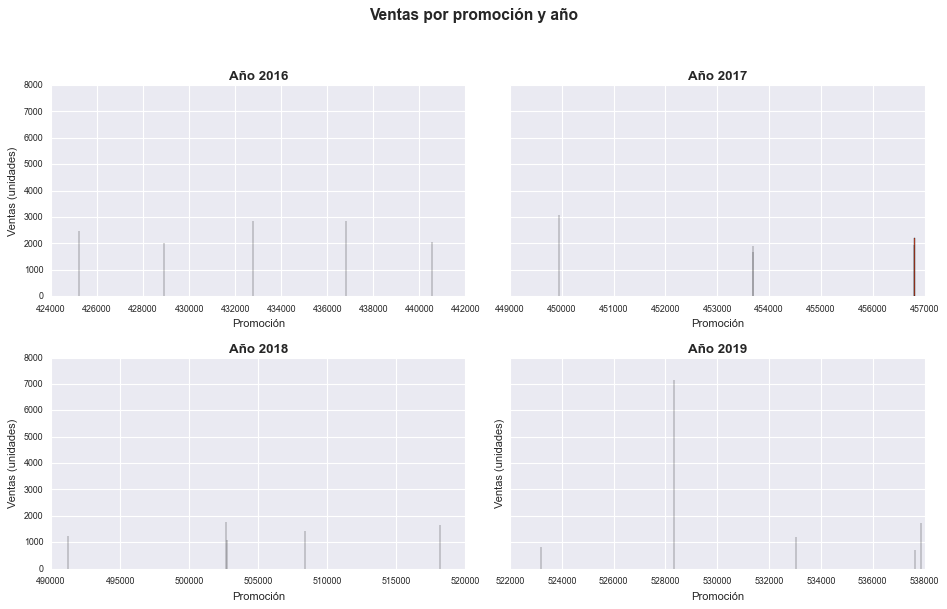

In [166]:
import matplotlib.pyplot as plt

# Cargar los datos
datos_2016 = df_mejor_promo_2016_2
datos_2017 = df_mejor_promo_2017_2
datos_2018 = df_mejor_promo_2018_2
datos_2019 = df_mejor_promo_2019_2

# Crear el panel de gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True)

# Definir los colores para cada gráfico
colores = ['#FFC107', '#FF5733', '#C70039', '#900C3F']

# Definir los títulos y etiquetas de los ejes
titulo = 'Ventas por promoción y año'
titulo_x = 'Promoción'
titulo_y = 'Ventas (unidades)'

# Gráfico 1
axs[0, 0].bar(datos_2016['nro_prom'], datos_2016['venta_unidades'], color=colores[0])
axs[0, 0].set_title('Año 2016', fontsize=12, fontweight='bold')
axs[0, 0].set_xlabel(titulo_x, fontsize=10)
axs[0, 0].set_ylabel(titulo_y, fontsize=10)
axs[0, 0].tick_params(axis='both', labelsize=8)
axs[0, 0].spines['right'].set_visible(False)
axs[0, 0].spines['top'].set_visible(False)

# Gráfico 2
axs[0, 1].bar(datos_2017['nro_prom'], datos_2017['venta_unidades'], color=colores[1])
axs[0, 1].set_title('Año 2017', fontsize=12, fontweight='bold')
axs[0, 1].set_xlabel(titulo_x, fontsize=10)
axs[0, 1].tick_params(axis='both', labelsize=8)
axs[0, 1].spines['right'].set_visible(False)
axs[0, 1].spines['top'].set_visible(False)

# Gráfico 3
axs[1, 0].bar(datos_2018['nro_prom'], datos_2018['venta_unidades'], color=colores[2])
axs[1, 0].set_title('Año 2018', fontsize=12, fontweight='bold')
axs[1, 0].set_xlabel(titulo_x, fontsize=10)
axs[1, 0].set_ylabel(titulo_y, fontsize=10)
axs[1, 0].tick_params(axis='both', labelsize=8)
axs[1, 0].spines['right'].set_visible(False)
axs[1, 0].spines['top'].set_visible(False)

# Gráfico 4
axs[1, 1].bar(datos_2019['nro_prom'], datos_2019['venta_unidades'], color=colores[3])
axs[1, 1].set_title('Año 2019', fontsize=12, fontweight='bold')
axs[1, 1].set_xlabel(titulo_x, fontsize=10)
axs[1, 1].set_ylabel(titulo_y, fontsize=10)
axs[1, 1].tick_params(axis='both', labelsize=8)
axs[1, 1].spines['right'].set_visible(False)
axs[1, 1].spines['top'].set_visible(False)

#Ajustar el espacio entre los gráficos y el título
fig.suptitle(titulo, fontsize=14, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

#Mostrar el panel de gráficos
plt.show()

#### Por zonas

ZONA 1

In [167]:

df_zona1 = df[(df['zona']==1)]


In [174]:
ventas_promo_z1 = df_zona1.loc[df['tiene_promo']==1, 'venta_unidades'].sum()

print("La cantidad de ventas de productos con promoción en la zona 1 es:", ventas_promo_z1)

La cantidad de ventas de productos con promoción en la zona 1 es: 1292


In [176]:
ventas_sin_promo_z1 = df_zona1.loc[df['tiene_promo']==0, 'venta_unidades'].sum()

df_promo_zona2 = df[(df['tiene_promo'] == 1) & (df['zona']==2)]print("La cantidad de ventas de productos con promoción en la zona 1 es:", ventas_sin_promo_z1)

La cantidad de ventas de productos con promoción en la zona 1 es: 25332


In [195]:
df_promo_zona1 = df[(df['tiene_promo'] == 1) & (df['zona']==1)]
df_mejor_promo_z1 = df_promo_zona1.groupby('nro_prom')['venta_unidades'].sum().reset_index()
df_mejor_promo_z1 = df_mejor_promo_z1.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo_zona1=df_mejor_promo_z1.head(5)

df_mejor_promo_zona1

,nro_prom,venta_unidades
13,528346,331
3,436830,193
6,449953,157
7,453692,98
4,440561,92


ZONA 2

In [178]:
df_zona2 = df[(df['zona']==2)]

In [179]:
ventas_promo_z2 = df_zona2.loc[df['tiene_promo']==1, 'venta_unidades'].sum()

print("La cantidad de ventas de productos con promoción en la zona 2 es:", ventas_promo_z2)

La cantidad de ventas de productos con promoción en la zona 2 es: 3517


In [180]:
ventas_sin_promo_z2 = df_zona2.loc[df['tiene_promo']==0, 'venta_unidades'].sum()

print("La cantidad de ventas de productos con promoción en la zona 2 es:", ventas_sin_promo_z2)

La cantidad de ventas de productos con promoción en la zona 2 es: 119095


In [188]:
df_promo_zona2 = df[(df['tiene_promo'] == 1) & (df['zona']==2)]

df_mejor_promo_z2 = df_promo_zona2.groupby('nro_prom')['venta_unidades'].sum().reset_index()
df_mejor_promo_z2 = df_mejor_promo_z2.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo_zona2=df_mejor_promo_z2.head(5)

df_mejor_promo_zona2

,nro_prom,venta_unidades
17,528346,945
0,425200,401
4,432776,399
8,449953,282
5,436830,239


ZONA 3

In [181]:
df_zona3 = df[(df['zona']==3)]

In [182]:
ventas_promo_z3 = df_zona3.loc[df['tiene_promo']==1, 'venta_unidades'].sum()

print("La cantidad de ventas de productos con promoción en la zona 3 es:", ventas_promo_z3)

La cantidad de ventas de productos con promoción en la zona 3 es: 11801


In [183]:
ventas_sin_promo_z3 = df_zona3.loc[df['tiene_promo']==0, 'venta_unidades'].sum()

print("La cantidad de ventas de productos con promoción en la zona 3 es:", ventas_sin_promo_z3)

La cantidad de ventas de productos con promoción en la zona 3 es: 294497


In [189]:
df_promo_zona3 = df[(df['tiene_promo'] == 1) & (df['zona']==3)]

df_mejor_promo_z3 = df_promo_zona3.groupby('nro_prom')['venta_unidades'].sum().reset_index()
df_mejor_promo_z3 = df_mejor_promo_z3.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo_zona3=df_mejor_promo_z3.head(5)

df_mejor_promo_zona3

,nro_prom,venta_unidades
35,484088,1020
49,528346,937
34,484062,651
2,428910,611
37,488290,562


ZONA 4

In [184]:
df_zona4 = df[(df['zona']==4)]

In [185]:
ventas_promo_z4 = df_zona4.loc[df['tiene_promo']==1, 'venta_unidades'].sum()

print("La cantidad de ventas de productos con promoción en la zona 4 es:", ventas_promo_z4)

La cantidad de ventas de productos con promoción en la zona 4 es: 57401


In [186]:
ventas_sin_promo_z4 = df_zona4.loc[df['tiene_promo']==0, 'venta_unidades'].sum()

print("La cantidad de ventas de productos con promoción en la zona 4 es:", ventas_sin_promo_z4)

La cantidad de ventas de productos con promoción en la zona 4 es: 2108755


In [192]:
df_promo_zona4 = df[(df['tiene_promo'] == 1) & (df['zona']==4)]

df_mejor_promo_z4 = df_promo_zona4.groupby('nro_prom')['venta_unidades'].sum().reset_index()
df_mejor_promo_z4 = df_mejor_promo_z4.sort_values(by='venta_unidades', ascending=False)

df_mejor_promo_zona4=df_mejor_promo_z4.head(5)

df_mejor_promo_zona4

,nro_prom,venta_unidades
94,528346,4950
31,449953,2126
15,432776,2110
39,456807,2099
18,436830,1967


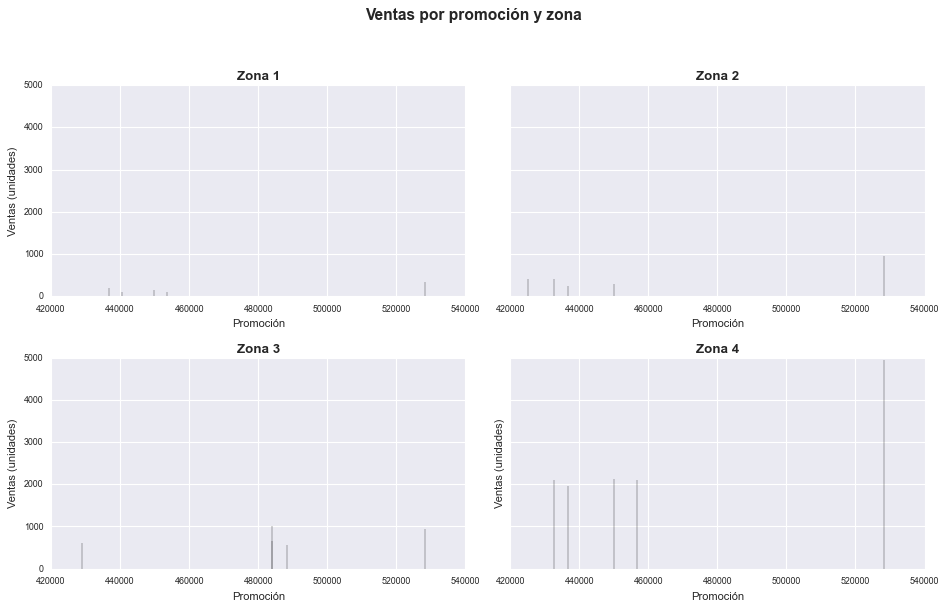

In [201]:
# Cargar los datos
zona1 = df_mejor_promo_zona1
zona2 = df_mejor_promo_zona2
zona3 = df_mejor_promo_zona3
zona4 = df_mejor_promo_zona4

# Crear el panel de gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True)

# Definir los colores para cada gráfico
colores = ['#FFC107', '#FF5733', '#C70039', '#900C3F']

# Definir los títulos y etiquetas de los ejes
titulo = 'Ventas por promoción y zona'
titulo_x = 'Promoción'
titulo_y = 'Ventas (unidades)'

# Gráfico 1
axs[0, 0].bar(zona1['nro_prom'], zona1['venta_unidades'], color=colores[0])
axs[0, 0].set_title('Zona 1', fontsize=12, fontweight='bold')
axs[0, 0].set_xlabel(titulo_x, fontsize=10)
axs[0, 0].set_ylabel(titulo_y, fontsize=10)
axs[0, 0].tick_params(axis='both', labelsize=8)
axs[0, 0].spines['right'].set_visible(False)
axs[0, 0].spines['top'].set_visible(False)

# Gráfico 2
axs[0, 1].bar(zona2['nro_prom'], zona2['venta_unidades'], color=colores[1])
axs[0, 1].set_title('Zona 2', fontsize=12, fontweight='bold')
axs[0, 1].set_xlabel(titulo_x, fontsize=10)
axs[0, 1].tick_params(axis='both', labelsize=8)
axs[0, 1].spines['right'].set_visible(False)
axs[0, 1].spines['top'].set_visible(False)

# Gráfico 3
axs[1, 0].bar(zona3['nro_prom'], zona3['venta_unidades'], color=colores[2])
axs[1, 0].set_title('Zona 3', fontsize=12, fontweight='bold')
axs[1, 0].set_xlabel(titulo_x, fontsize=10)
axs[1, 0].set_ylabel(titulo_y, fontsize=10)
axs[1, 0].tick_params(axis='both', labelsize=8)
axs[1, 0].spines['right'].set_visible(False)
axs[1, 0].spines['top'].set_visible(False)

# Gráfico 4
axs[1, 1].bar(zona4['nro_prom'], zona4['venta_unidades'], color=colores[3])
axs[1, 1].set_title('Zona 4', fontsize=12, fontweight='bold')
axs[1, 1].set_xlabel(titulo_x, fontsize=10)
axs[1, 1].set_ylabel(titulo_y, fontsize=10)
axs[1, 1].tick_params(axis='both', labelsize=8)
axs[1, 1].spines['right'].set_visible(False)
axs[1, 1].spines['top'].set_visible(False)

#Ajustar el espacio entre los gráficos y el título
fig.suptitle(titulo, fontsize=14, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

#Mostrar el panel de gráficos
plt.show()

In [206]:
# Crear un DataFrame con los datos
datos = pd.DataFrame({
    'año': [2016, 2016, 2017, 2017, 2018, 2018, 2019, 2019],
    'tiene_promo': [1, 0, 1, 0, 1, 0, 1, 0],
    'venta_unidades': [23515, 418717, 19686, 921852, 16488, 837238, 14322, 369872]
})
datos

,año,tiene_promo,venta_unidades
0,2016,1,23515
1,2016,0,418717
2,2017,1,19686
3,2017,0,921852
4,2018,1,16488
5,2018,0,837238
6,2019,1,14322
7,2019,0,369872


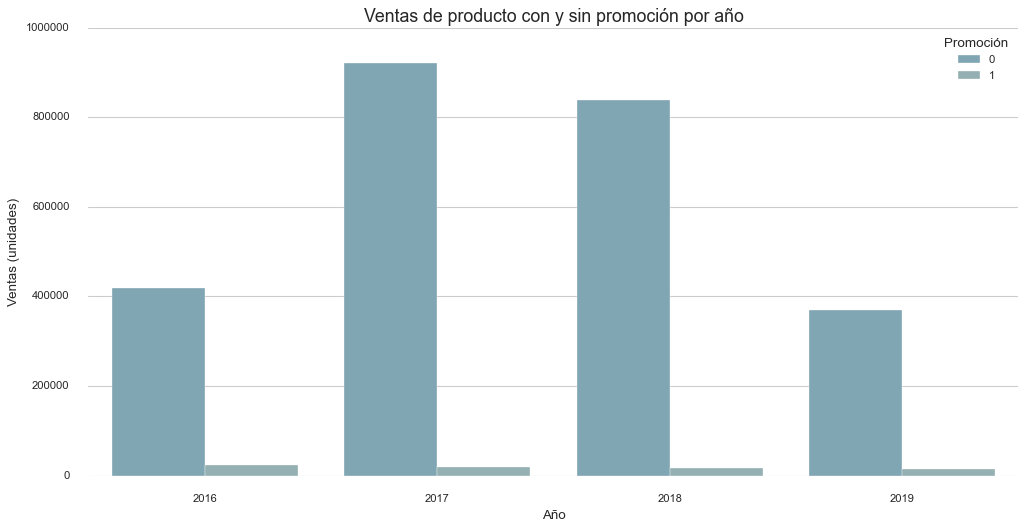

In [215]:
plt.figure(figsize=[15,7])
with sns.axes_style("whitegrid"):
    ax = sns.barplot(x='año', y='venta_unidades', hue='tiene_promo', data=datos)
    sns.despine(offset=10, trim=True)
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.title('Ventas de producto con y sin promoción por año', fontsize=16)
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Ventas (unidades)', fontsize=12)
    plt.legend(title='Promoción')
    #plt.savefig(f'images/Ventas_por_año_con_y_sin_promoción', dpi=300, bbox_inches='tight')
plt.show()

In [212]:
# Crear un DataFrame con los datos
data = pd.DataFrame({
    'zona': ['zona1', 'zona1', 'zona2', 'zona2', 'zona3', 'zona3', 'zona4', 'zona4'],
    'tiene_promo': [1, 0, 1, 0, 1, 0, 1, 0],
    'venta_unidades': [1292, 25332, 3517, 119095, 11801, 294497, 57401, 2108755]
})
data

,zona,tiene_promo,venta_unidades
0,zona1,1,1292
1,zona1,0,25332
2,zona2,1,3517
3,zona2,0,119095
4,zona3,1,11801
5,zona3,0,294497
6,zona4,1,57401
7,zona4,0,2108755


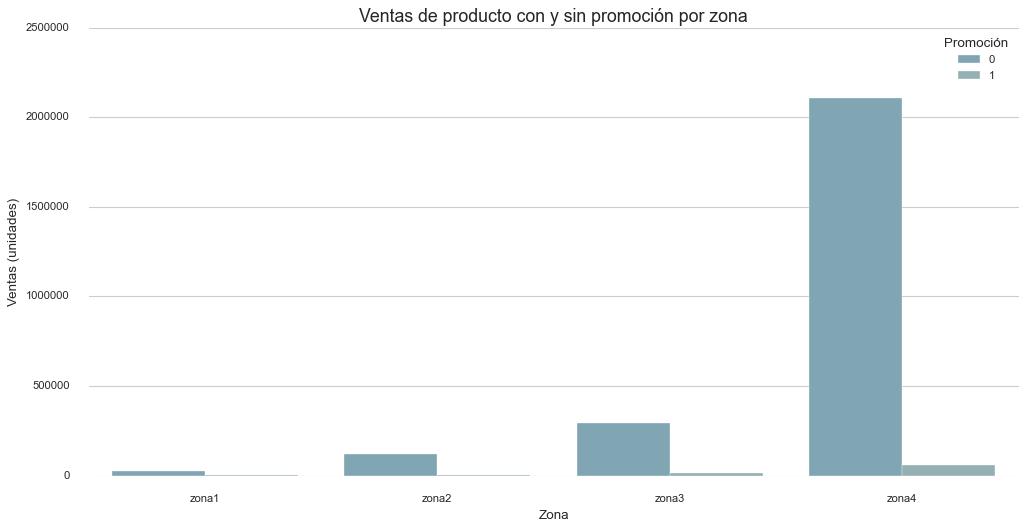

In [214]:
plt.figure(figsize=[15,7])
with sns.axes_style("whitegrid"):
    ax = sns.barplot(x='zona', y='venta_unidades', hue='tiene_promo', data=data)
    sns.despine(offset=10, trim=True)
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.title('Ventas de producto con y sin promoción por zona', fontsize=16)
    plt.xlabel('Zona', fontsize=12)
    plt.ylabel('Ventas (unidades)', fontsize=12)
    plt.legend(title='Promoción')
    #plt.savefig(f'images/Ventas_por_zona_con_y_sin_promoción', dpi=300, bbox_inches='tight')
plt.show()